In [1]:
from pulsee.simulation import *
from pulsee.plot import *
from pulsee.pulses import Pulses

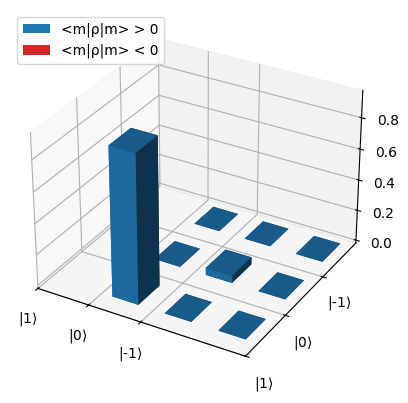

In [2]:
spin_par = {'quantum number' : 1.,
            'gamma/2pi' : 1.}
    
zeem_par = {'field magnitude' : 1.,
            'theta_z' : 0.,
            'phi_z' : 0.}
                
spin, h_unperturbed, dm_0 = nuclear_system_setup(spin_par=spin_par, quad_par=None, 
                                                 zeem_par=zeem_par, initial_state='canonical', 
                                                 temperature=1e-4)
fig = plot_real_part_density_matrix(dm_0)

PRINTING OUT DIMS[0]: [3]


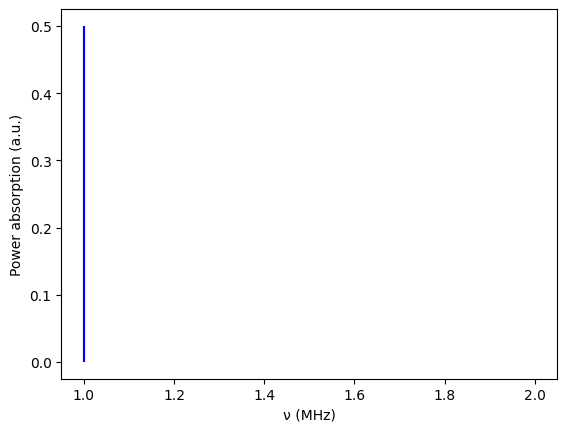

In [3]:
f, p = power_absorption_spectrum(spin, h_unperturbed, normalized=True)
_ = plot_power_absorption_spectrum(f, p)

In [4]:
pulse_time=1 / (np.sqrt(2) * 4 * 0.2)
mode = Pulses(frequencies=[2*np.pi], amplitudes=[0.2], phases=[0], theta_p=[np.pi/2], phi_p=[0], pulse_times=[pulse_time])

/Users/Alex/opt/anaconda3/envs/pulsee_env/lib/python3.11/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
100%|█████████████████████████████████████████| 30/30 [00:00<00:00, 1466.54it/s]


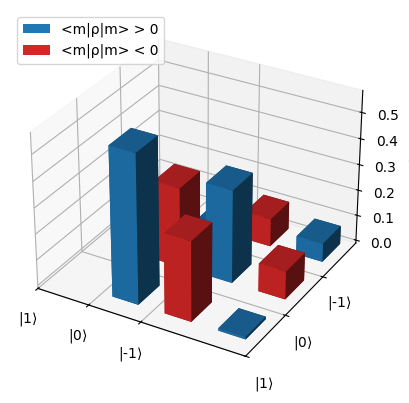

In [5]:
dm_evolved = evolve(spin, h_unperturbed, dm_0, solver=magnus, \
                    mode=mode, \
                    picture = 'IP', n_points=30)
    
fig = plot_real_part_density_matrix(dm_evolved)

/Users/Alex/opt/anaconda3/envs/pulsee_env/lib/python3.11/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
/Users/Alex/opt/anaconda3/envs/pulsee_env/lib/python3.11/site-packages/qutip/solver/solver_base.py:453: FutureWarning: "progress_bar" is now included in options:
 Use `options={"progress_bar": False / True / "tqdm" / "enhanced"}`
  warnings.warn(
/Users/Alex/Documents/GitHub/PULSEE/src/pulsee/simulation.py:796: UserWarning: Unreliable FID: Weak signal, check simulation!
  warnings.warn("Unreliable FID: Weak signal, check simulation!", stacklevel=0)


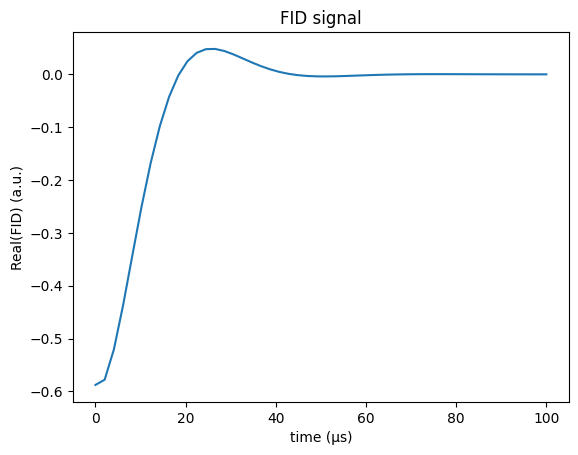

In [6]:
t, fid = FID_signal(spin, h_unperturbed, dm_evolved, acquisition_time=100, T2=10, n_points=50)

_ = plot_real_part_FID_signal(t, fid)

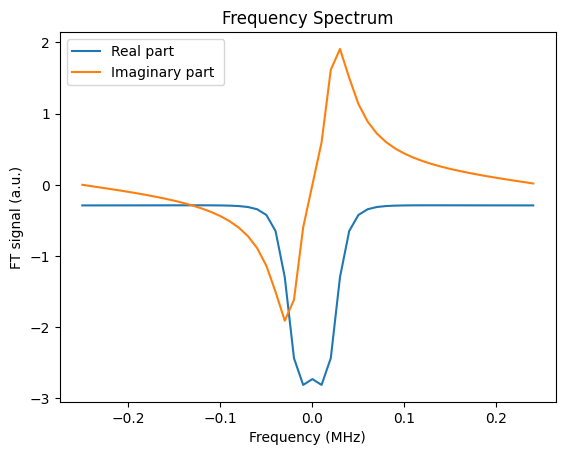

In [7]:
f, ft = fourier_transform_signal(fid, t)
    
fig, ax = plot_fourier_transform(f, ft, square_modulus=False, norm=False)

In [8]:
quad_par = {'coupling constant' : 0.2,
            'asymmetry parameter' : 0.,
            'alpha_q' : 0.,
            'beta_q' : 0.,
            'gamma_q' : 0.,
            'order' : 0}
            
spin, h_unperturbed, dm_0 = nuclear_system_setup(spin_par=spin_par, quad_par=quad_par,
												 zeem_par=zeem_par, initial_state='canonical', 
												 temperature=1e-4)

In [9]:
dm_evolved = evolve(spin, h_unperturbed, dm_0, solver=magnus, \
                    mode=mode, \
                    picture = 'IP', n_points = 10)


100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 1746.17it/s]


PRINTING OUT DIMS[0]: [3]


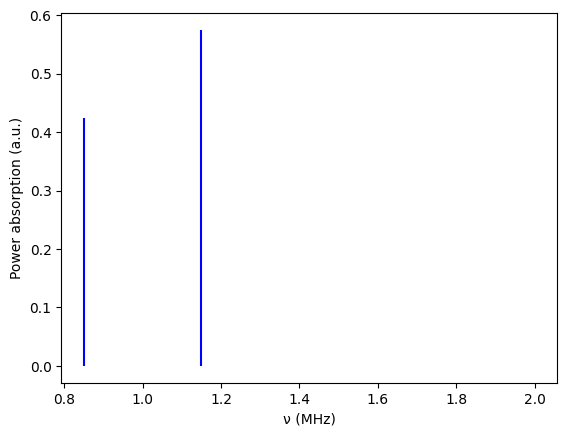

In [10]:
f, p = power_absorption_spectrum(spin, h_unperturbed, normalized=True)
_ = plot_power_absorption_spectrum(f, p)

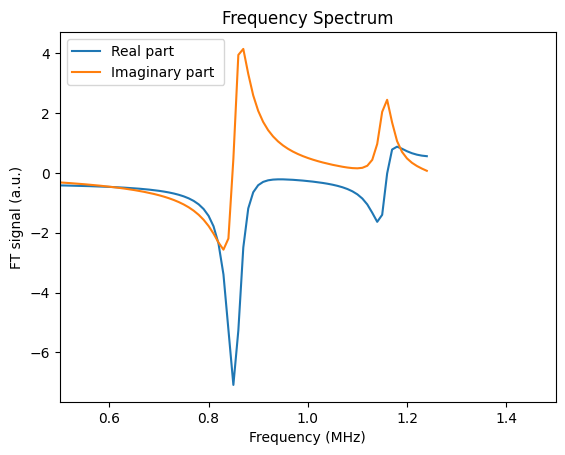

In [11]:
t, fid = FID_signal(spin, h_unperturbed, dm_evolved, acquisition_time=100, T2=10, n_points=250)
f, ft = fourier_transform_signal(fid, t) 
fig = plot_fourier_transform(f, ft, square_modulus=False, norm=False, xlim=(0.5, 1.5))

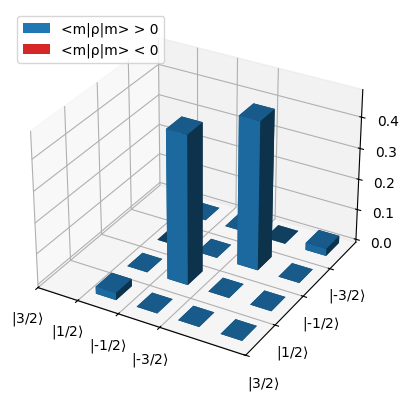

In [12]:
spin_par = {'quantum number' : 3/2,
            'gamma/2pi' : 1.}
    
quad_par = {'coupling constant' : 2.,
            'asymmetry parameter' : 0.,
            'alpha_q' : 0.,
            'beta_q' : 0.,
            'gamma_q' : 0.,
            'order' : 0.}
            
spin, h_unperturbed, dm_0 = nuclear_system_setup(spin_par=spin_par, 
												 quad_par=quad_par, zeem_par=None, 
												 initial_state='canonical', 
												 temperature=1e-4)
fig = plot_real_part_density_matrix(dm_0)

In [13]:
pulse_time=1 / (np.sqrt(2) * 4 * 0.2)
mode = Pulses(frequencies=[2*np.pi], amplitudes=[0.2], phases=[0], theta_p=[np.pi/2], phi_p=[0], pulse_times=[pulse_time])

/Users/Alex/opt/anaconda3/envs/pulsee_env/lib/python3.11/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
100%|█████████████████████████████████████████| 60/60 [00:00<00:00, 2433.08it/s]


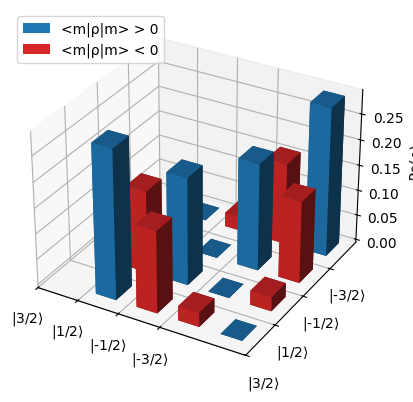

In [14]:
dm_evolved = evolve(spin, h_unperturbed, dm_0, solver=magnus, \
                    mode=mode, \
                    picture = 'IP', n_points = 60)
fig = plot_real_part_density_matrix(dm_evolved)

PRINTING OUT DIMS[0]: [4]


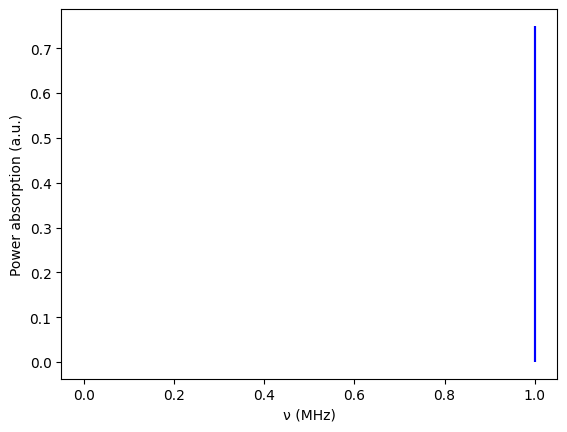

In [15]:
f, p = power_absorption_spectrum(spin, h_unperturbed, normalized=True)
_ = plot_power_absorption_spectrum(f, p)

/Users/Alex/opt/anaconda3/envs/pulsee_env/lib/python3.11/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
/Users/Alex/opt/anaconda3/envs/pulsee_env/lib/python3.11/site-packages/qutip/solver/solver_base.py:453: FutureWarning: "progress_bar" is now included in options:
 Use `options={"progress_bar": False / True / "tqdm" / "enhanced"}`
  warnings.warn(


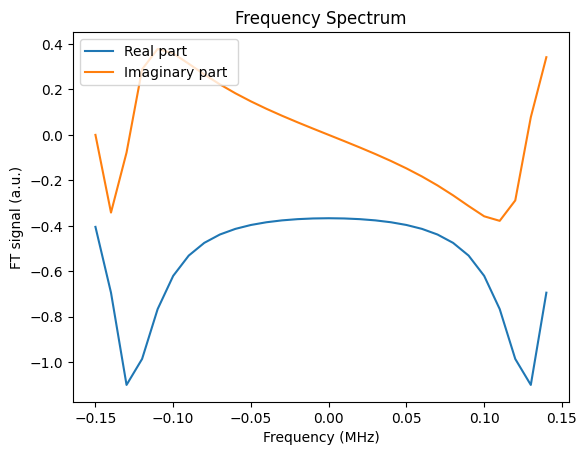

In [16]:
t, fid = FID_signal(spin, h_unperturbed, dm_evolved, acquisition_time=100, T2=10, n_points=30)
f, ft = fourier_transform_signal(fid, t)

fig = plot_fourier_transform(f, ft, norm=False)